In [ ]:
##Francois Chollet AI model that predicts movie reviews

#input & defining of the training set in AI
#import keras library
import keras
from keras import models
from keras import layers


#basic principles of the training data set, define input parameters and desired output parameters
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)
model = models.Model(inputs = input_tensor, outputs = output_tensor)

#can also be done with the sequential class

#deep learning is configured during optimisation process with an optimiser and a loss function, both must be defined for the model to use them
#need to define parameters that will be used to monitor the process of learning
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

#use Numpy arrays to input desired input and desired output parameters into the model using a fit function
#same principle as in sci-kit learn library
#there is no code defining target_tensor so the line below doesn't work yet
model.fit(input_tensor, target_tensor, batch_size=28, epochs=10)

TypeError: ignored

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

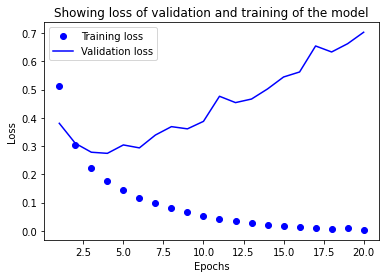

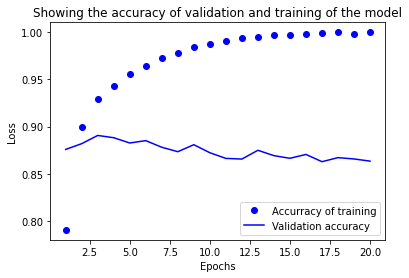

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4826 - accuracy: 0.8006
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2673 - accuracy: 0.9115
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2056 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 3ms/step


array([[0.14912629],
       [0.99811155],
       [0.8354176 ],
       ...,
       [0.08795603],
       [0.04744004],
       [0.60744023]], dtype=float32)

In [ ]:
#importing IMDB database with movie ratings, the option to extract this dataset already exists within
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
#due to file size only keep 10k words
#train_data and test_data are lists of reviews, each review is a list of words
#labels are assigned to categorise reviews into positive and negative as numbers, 0 is negative review, 1 is a positive
train_data[0]
test_labels[0]
max([max(sequence) for sequence in train_data])

#you can use a loop to read one of the reviews in English
word_index = imdb.get_word_index() #assign index to every word
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
#reverse index to get words
#fetch the first review in the train_data using the reversed_index
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

#before using data within the learning model you must convert it into tensors or vectors of 0s and 1s
#you can turn it into tensors of same dimesions, with integers (samples, word_index), then use first layer of the learning network to 
#convert tensors into integers with Embedding

#or as shown below
#you can encode vectors of 0s and 1s, separated by ',' and depending on index e.g. [6,4] it will only contain 0s at all positions except index 6 and 4
#index of 6 and 4 will contain 1s
#use Dense layer to convert vectors
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1,
  return results

#creates vector with dimensions(len(seuqences), 10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#change labels into vectors as well
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

#simple vectors can be run on model Dense with function 'relu
#simple model with 2 layers and 16 nodes per layer, process the data with relu function
#you have to define number of nodes per layer and number of layers per model
#3rd layter uses sigmoid function that can squeeze/convert all values into  0s and 1s and generate predictive model, which determines positive review


#building the model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#now need to define loss function and optimilisation 
#loss of function for this example would be binary_crossentropy 
#which fits the categorisation of reviews in binary manner and works well with sigmoid function
#mean_squared_error is another loss function but it works best with probability outputs
#mean_squared_error calculates the distance of desired output vs achieved output

#now choosing optimilisation via rmsprop, choosing binary_crossentropy as loss of function, and checking the model with accurracy
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy',])
#these are in-built in Keras, you can also use optimiser and loss function from a class, or a function 

#now exclude data to prepare a validation dataset for this model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#the model will be run across 20 epochs (iterations) with 512 samples, while 
#in the meantime the model will be validated against 10k samples set aside above
#validation data set is defined in a separate argument
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy',])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#takes 20 s with minor interruptions as the model is being validated
#having closer look at the history variable which shows the process of the training of the model

history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

#plotting now loss function and validation of the model
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Showing loss of validation and training of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
#plotting accuracy of model training and validation

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Accurracy of training')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Showing the accuracy of validation and training of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#training now data set again since 20 epochs was too much and it caused overfitting of the model
#now training with 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy',])

history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

results = model.evaluate(x_test, y_test)

results
#should show accuracy of ~80%
#can now use the model to predict
model.predict(x_test)

#can also use loss function 'mse', activation function of tanh, and different number of nodes per layer

